# Plotting ASE results on MS GWAS genes

In [1]:
import numpy as np
import pandas as pd

In [2]:
import hilearn
import vireoSNP

new_dir = '/usersdata/yuanhua/msNewData/eQTLres/snp-ASE/'
vcf_dir = "/usersdata/yuanhua/archiveEBI/msclerosis/gwas/"

### MS SNPs

In [3]:
df_SNP = pd.read_csv(new_dir + "MS_gene_expSNP.LD_R2.tsv", sep="\t")
df_SNP

,CHROM,POS,ID,REF,ALT,cis_gene,n_ms_genes,variant,LD_R2_max,LD_R2_SNP
0,10,5943662,rs10752157,C,A,IL15RA,1,rs10752157,0.004,rs62626325
1,10,5949049,rs11256084,C,T,IL15RA,1,rs11256084,-2.000,Nan
2,10,5949072,rs11256085,T,C,IL15RA,1,rs11256085,0.012,rs1399180
3,10,5950672,rs41294023,G,A,IL15RA,1,rs41294023,0.012,rs7923837
4,10,5950678,rs11256094,C,T,IL15RA,1,rs11256094,0.004,rs2104286
...,...,...,...,...,...,...,...,...,...,...
8041,9,98109271,rs2417730,A,C,TRIM14,1,rs2417730,0.017,rs4743150
8042,9,98115197,rs7022262,T,C,TRIM14,1,rs7022262,0.018,rs4743150
8043,9,98115994,rs10818493,C,T,TRIM14,1,rs10818493,0.014,rs4743150
8044,9,98117267,rs80243446,G,C,TRIM14,1,rs80243446,0.017,rs4743150


In [4]:
gene_list = []
for _genes in df_SNP['cis_gene']:
    gene_list += _genes.split(",")
    
len(np.unique(gene_list)), len(np.unique(df_SNP['cis_gene']))

(514, 512)

In [5]:
np.sum(df_SNP['LD_R2_max'] > 0.15), np.mean(df_SNP['LD_R2_max'] > 0.15)

(1131, 0.14056674123788218)

In [6]:
df_SNP = df_SNP[df_SNP['LD_R2_max'] > 0.15]

In [7]:
MS_ASE_snp = np.array(
    [str(df_SNP['CHROM'][x]) + "_" + str(df_SNP['POS'][x]) + "_" +
     df_SNP['REF'][x] + "_" + df_SNP['ALT'][x] for x in df_SNP.index]
)
MS_ASE_genes = df_SNP['cis_gene'].values.astype(str)

print(len(MS_ASE_snp), len(MS_ASE_genes))
MS_ASE_snp[:3], MS_ASE_genes[:3]

1131 1131


(array(['10_6016772_G_C', '10_6023648_A_G', '10_6041329_A_G'], dtype='<U16'),
 array(['IL2RA', 'IL2RA', 'IL2RA'], dtype='<U27'))

In [8]:
MS_ASE_genes_single = []
for g in MS_ASE_genes:
    g_list = g.split(',')
    if len(g_list) > 1:
        g_lens = [len(x) for x in g_list]
        MS_ASE_genes_single.append(g_list[np.argmin(g_lens)])
    else:
        MS_ASE_genes_single.append(g)
MS_ASE_genes_single = np.array(MS_ASE_genes_single)

print(len(MS_ASE_snp), len(MS_ASE_genes), len(MS_ASE_genes_single))

1131 1131 1131


In [9]:
gene_list = []
for _genes in df_SNP['cis_gene']:
    gene_list += _genes.split(",")
    
len(np.unique(gene_list)), len(np.unique(df_SNP['cis_gene'])), \
len(np.unique(MS_ASE_genes_single))

(254, 247, 239)

### ASE results on MS genes

In [10]:
cell_type_list = [
    'B_cell', 'CD4+_T_cell', 'CD4+_Treg_cell', 'CD8+_T_cell', 
    'CD8+_gd_T_cell', 'MALAT1low_myeloid_cell', 'NK_cell', 'cDC1', 
    'cDC2', 'macrophage', 'monocyte', 'pDC', 'plasma_cell'
]

ct_idx = [1, 3, 8, 10, 9, 2, 6, 5, 11, 4, 0]
ct_ids = ['CD4 T cell', 'CD8 T cell', 'cDC2 cell', 'Monocyte', 'Macrophage', 
          'CD4 T-reg cell', 'NK cell', 'MALAT1-Low myeloid', 'pDC cell',
          'CD8 gd cell', 'B cell']

ct_use = np.array(cell_type_list)[ct_idx]
print(ct_use)

['CD4+_T_cell' 'CD8+_T_cell' 'cDC2' 'monocyte' 'macrophage'
 'CD4+_Treg_cell' 'NK_cell' 'MALAT1low_myeloid_cell' 'pDC'
 'CD8+_gd_T_cell' 'B_cell']


In [11]:
ase_res = pd.read_csv(new_dir + 'res_ASE/ASE.%s.ASE.res.tsv' %ct_use[6], 
                      sep='\t', header=0)

ase_res

,Estimate,Std. Error,z value,Pr(> |z|),FDR,affection_w,affection_p,affection_FDR,n_donors,n_reads
10_918366_C_T,-0.1240,0.3377,-0.366,0.71400,0.8810,-0.1430,0.833051,1.000,18,120
10_1040176_C_T,0.0706,0.2169,0.325,0.74500,0.8930,0.0317,0.935166,1.000,13,85
10_3779314_G_A,-0.9630,0.6438,-1.500,0.13500,0.3530,20.0000,0.012997,0.522,7,36
10_3779369_G_A,0.3080,0.1178,2.610,0.00907,0.0509,-0.0920,0.680503,0.961,18,295
10_5765558_T_C,-0.2060,0.1537,-1.340,0.18100,0.4230,-0.0831,0.757400,0.981,11,171
...,...,...,...,...,...,...,...,...,...,...
9_136724914_C_G,0.0332,0.1826,0.182,0.85600,0.9470,-0.6320,0.097319,0.634,23,120
9_137111750_G_A,0.1640,0.1338,1.230,0.22000,0.4740,0.0467,0.871621,1.000,26,220
9_137190033_G_A,-0.0240,0.2196,-0.109,0.91300,0.9610,0.0425,0.916041,1.000,17,83
9_137190301_A_G,-0.2630,0.2427,-1.080,0.27900,0.5520,-0.3210,0.471871,0.910,18,69


In [12]:
print(np.mean(ase_res.affection_w == ase_res.affection_w))

ase_res.loc['11_113216448_G_A'] #.affection_w

0.95


Estimate           0.6940
Std. Error         0.3185
z value            2.1800
Pr(> |z|)          0.0294
FDR                0.1240
affection_w           NaN
affection_p           NaN
affection_FDR         NaN
n_donors           3.0000
n_reads          516.0000
Name: 11_113216448_G_A, dtype: float64

In [13]:
ASE_mat = np.zeros((len(MS_ASE_snp), len(ct_use)))
FDR_mat = np.ones((len(MS_ASE_snp), len(ct_use))) * np.nan
Pva_mat = np.ones((len(MS_ASE_snp), len(ct_use))) * np.nan
don_mat = np.zeros((len(MS_ASE_snp), len(ct_use)))
CNT_mat = np.zeros((len(MS_ASE_snp), len(ct_use)))

ASE_mat[:, :] = np.nan
FDR_key = 'FDR'
# FDR_key = 'affection_FDR'

for j in range(len(ct_use)):
    ase_res = pd.read_csv(new_dir + 'res_ASE/ASE.%s.ASE.res.tsv' %ct_use[j], 
                          sep='\t', header=0)
    
    # ase_res[FDR_key][ase_res[FDR_key] == '   NA'] = '2' #'      NA'
    # ase_res[FDR_key] = ase_res[FDR_key].astype(np.float)
    
    idx_sig = ase_res[FDR_key] < 1e-3
    
    mm1 = hilearn.match(MS_ASE_snp, ase_res.index)    
    idx1 = mm1 != None
    idx2 = mm1[idx1].astype(int)
    df_tmp = ase_res.loc[ase_res.index[idx2]]
    
    print(ct_use[j], ase_res.shape[0], sum(idx_sig), 
          sum(idx1), sum(df_tmp[FDR_key]<1e-2))
    
    CNT_mat[idx1, j] = df_tmp.n_reads
    don_mat[idx1, j] = df_tmp.n_donors
    ASE_mat[idx1, j] = df_tmp.Estimate
    FDR_mat[idx1, j] = df_tmp[FDR_key]
    Pva_mat[idx1, j] = df_tmp['Pr(> |z|)']

CD4+_T_cell 26611 2945 435 70
CD8+_T_cell 15648 1349 276 41
cDC2 3979 437 64 11
monocyte 899 106 9 0
macrophage 3210 298 62 12
CD4+_Treg_cell 2388 225 52 11
NK_cell 1480 146 30 2
MALAT1low_myeloid_cell 598 95 3 0
pDC 646 69 6 0
CD8+_gd_T_cell 471 48 10 1
B_cell 451 61 10 1


In [14]:
ASE_mat.shape, np.mean(ASE_mat == ASE_mat)

((1131, 11), 0.07692307692307693)

#### Plotting

In [15]:
## All cell types
print(Pva_mat.shape)

sig_idx = np.where(np.sum(FDR_mat<1e-2, axis=1) >= 1)[0]
sig_gene = MS_ASE_genes[sig_idx]
print(len(sig_gene), len(np.unique(sig_gene)))

(1131, 11)
77 40


In [16]:
## Non CD4 T cell
sig_idx = np.where(np.sum(FDR_mat[:, 1:] < 1e-2, axis=1) >= 1)[0]
sig_gene = MS_ASE_genes[sig_idx]

print(len(sig_gene), len(np.unique(sig_gene)))

46 26


In [17]:
# for LIME1, we may count it only once and ignore the lncRNAs.
np.unique(sig_gene)

array(['AL121845.3,LIME1,AL121845.2', 'BACH2', 'CBLB', 'CD28', 'CLEC2D',
       'FOXP1', 'GRB2', 'IFITM2', 'IL7R', 'LBH', 'LY9', 'MARCH1', 'MCM9',
       'NCOA5', 'NFKB1', 'PLEK', 'PRR5L', 'SCO2,TYMP', 'THEMIS',
       'TNFAIP8', 'TNFRSF25', 'TRAF3', 'TYMP', 'UBASH3B', 'VMP1',
       'ZC3HAV1'], dtype='<U27')

In [18]:
sig_gene_uniq = np.unique(sig_gene)
sig_idx_uniq = []
for g in sig_gene_uniq:
    _idx = np.where(sig_gene == g)[0]
    _max_idx = np.argmax(don_mat[sig_idx[_idx], :].mean(axis=1))
    sig_idx_uniq.append(_idx[_max_idx])

In [19]:
sig_gene_short = []
for g in sig_gene_uniq:
    g_list = g.split(',')
    if len(g_list) > 1:
        g_lens = [len(x) for x in g_list]
        sig_gene_short.append(g_list[np.argmin(g_lens)])
    else:
        sig_gene_short.append(g)
sig_gene_short = np.array(sig_gene_short)

In [20]:
MS_ASE_genes

array(['IL2RA', 'IL2RA', 'IL2RA', ..., 'TRIM14', 'TRIM14', 'TRIM14'],
      dtype='<U27')

In [21]:
sig_gene_short

array(['LIME1', 'BACH2', 'CBLB', 'CD28', 'CLEC2D', 'FOXP1', 'GRB2',
       'IFITM2', 'IL7R', 'LBH', 'LY9', 'MARCH1', 'MCM9', 'NCOA5', 'NFKB1',
       'PLEK', 'PRR5L', 'SCO2', 'THEMIS', 'TNFAIP8', 'TNFRSF25', 'TRAF3',
       'TYMP', 'UBASH3B', 'VMP1', 'ZC3HAV1'], dtype='<U8')

In [22]:
don_mat_sig = don_mat[sig_idx[sig_idx_uniq], :]
FDR_mat_sig = FDR_mat[sig_idx[sig_idx_uniq], :]
ASE_mat_sig = ASE_mat[sig_idx[sig_idx_uniq], :]
don_mat_sig = don_mat[sig_idx[sig_idx_uniq], :]

sig_idx[sig_idx_uniq]

array([ 588, 1016,  747,  684,  126,  714,  363,   17,  919,  644,  562,
        909, 1025,  576,  863,  652,   28,  619, 1036,  928,  467,  190,
        620,   80,  351, 1096])

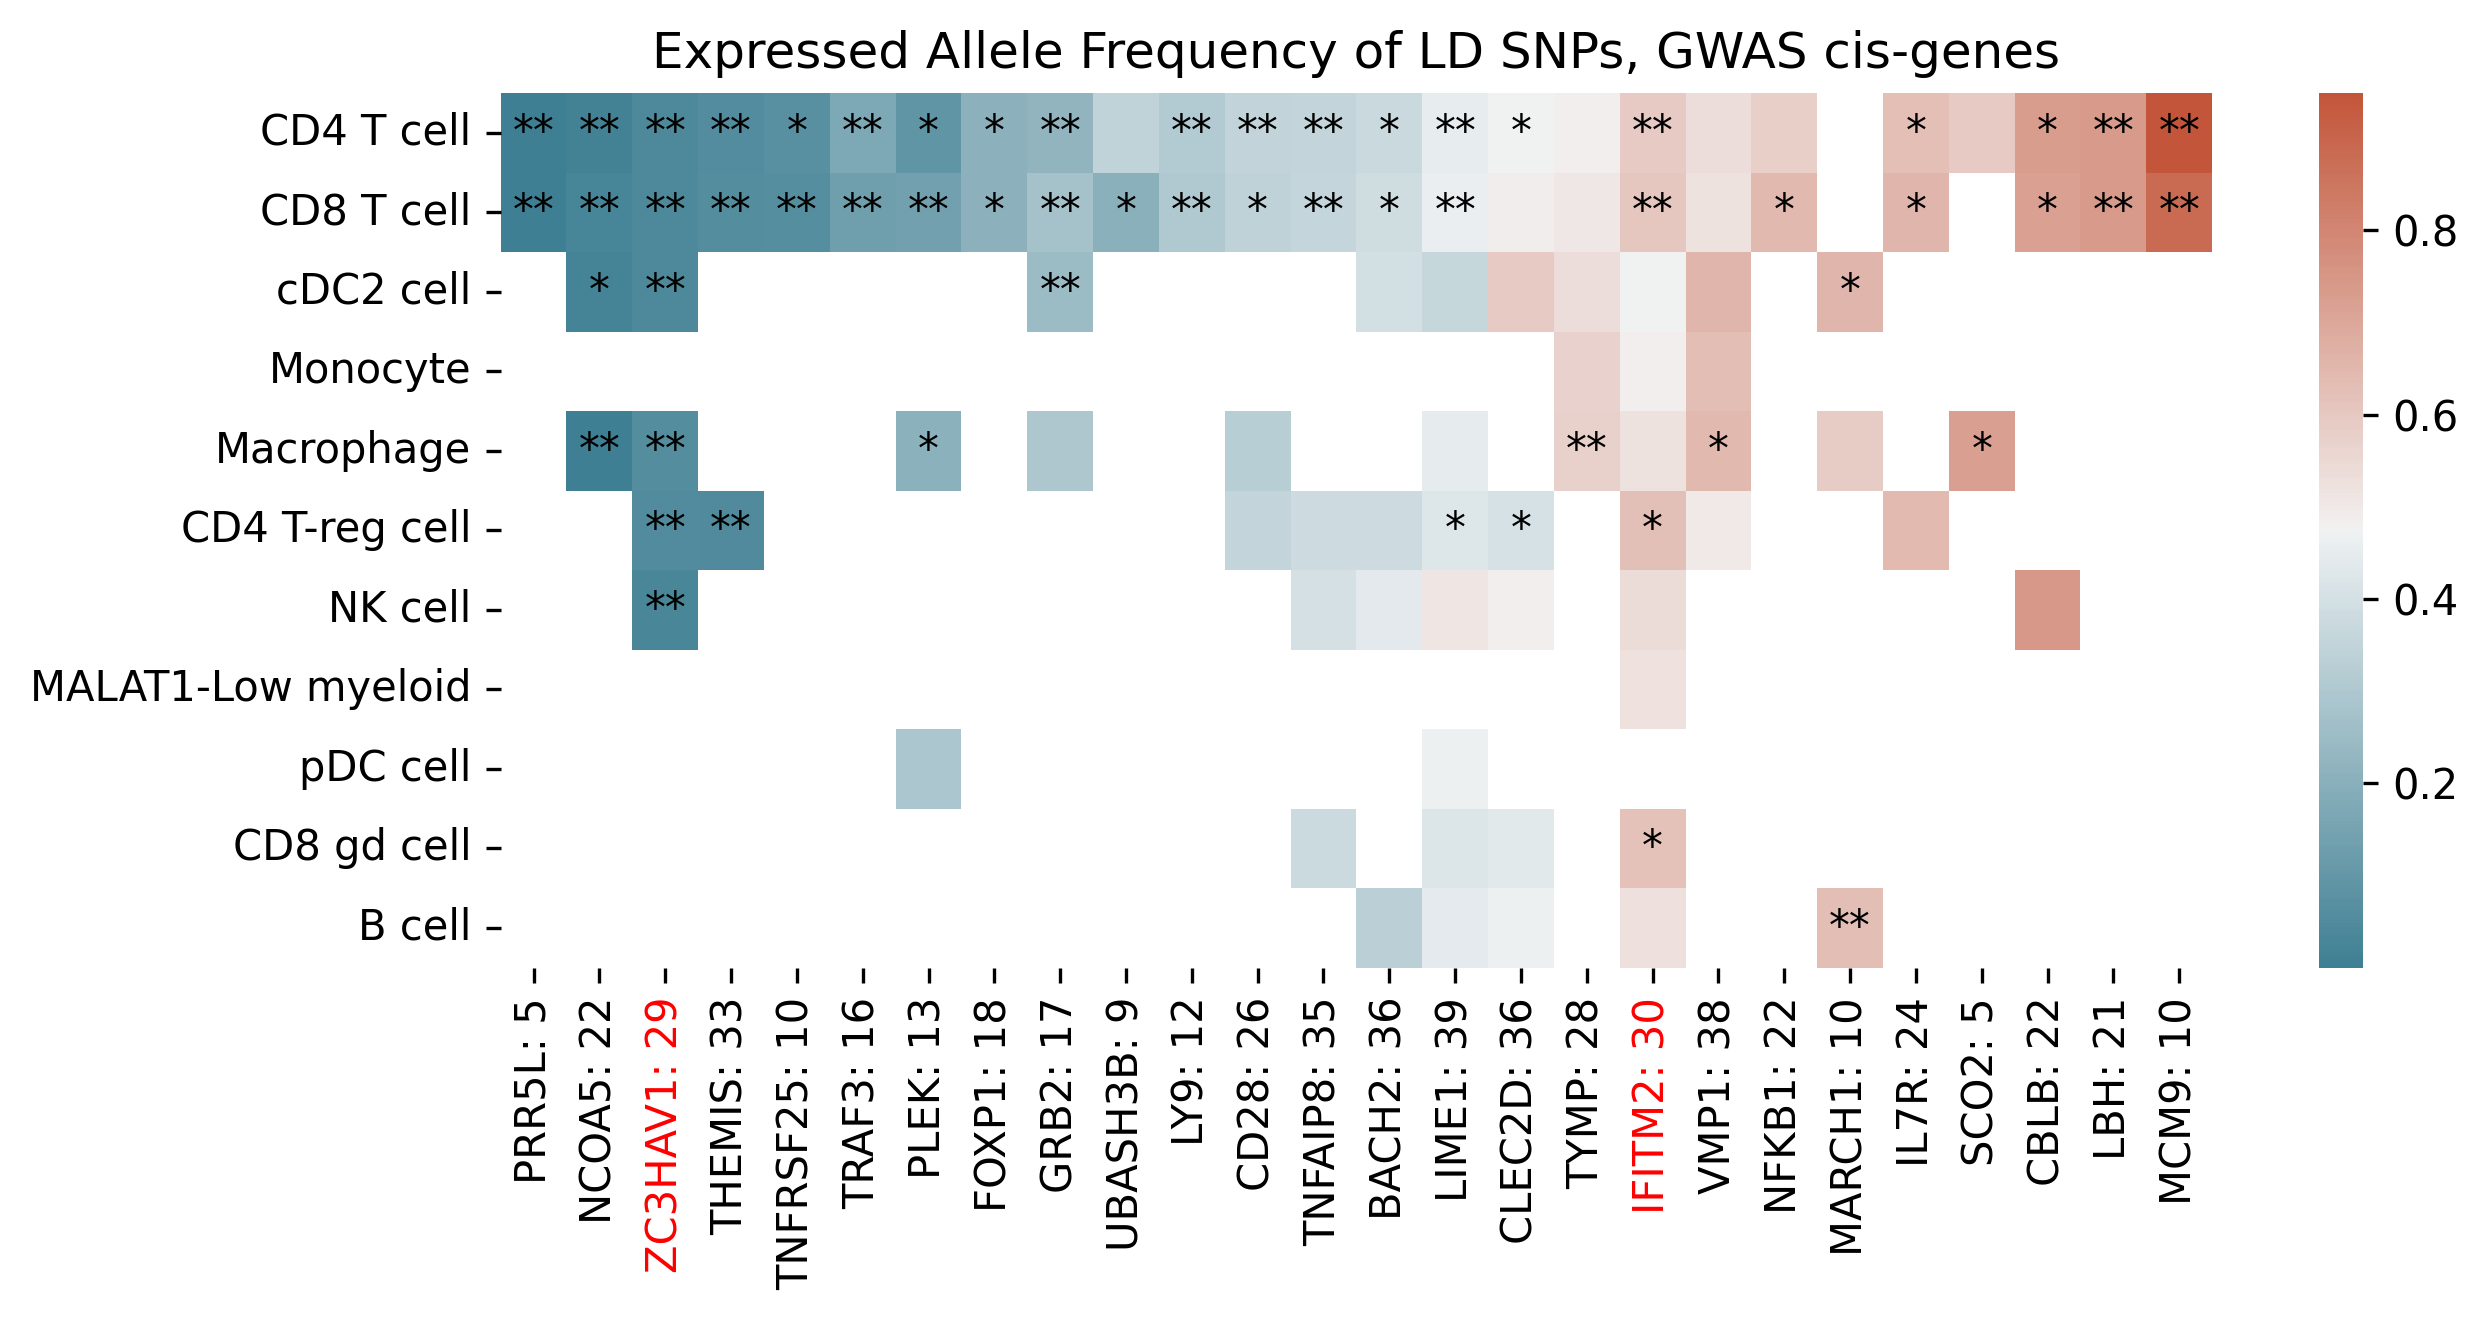

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import expit

#sns.set_theme()

fig_dir = '/usersdata/yuanhua/msNewData/fromMarc/figures/'

_sort_idx = np.argsort(np.nanmean(ASE_mat_sig, axis=1))
_sort_mat = ASE_mat_sig[_sort_idx, :].T
_sort_gen = sig_gene_short[_sort_idx]
_sort_FDR = FDR_mat_sig[_sort_idx, :]
_sort_don = np.max(don_mat_sig[_sort_idx, :], axis=1)
_gene_show = [_sort_gen[x] + ': %d' %(_sort_don[x]) for x in range(len(_sort_don))]

# fig = plt.figure(figsize=(12, 5.5), dpi=300)
fig = plt.figure(figsize=(9, 4.5), dpi=300)
_cmp = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(expit(_sort_mat), cmap=_cmp)
plt.yticks(np.arange(len(ct_ids)) + 0.5, ct_ids, rotation=0, ha='right')
plt.xticks(np.arange(len(_sort_gen)) + 0.5, _gene_show, rotation=90)
plt.title("Expressed Allele Frequency of LD SNPs, GWAS cis-genes") #disease allele

idx1 = np.where((_sort_FDR < 1e-2) * (_sort_FDR > 1e-4))
for ii in range(len(idx1[0])):
    plt.annotate("*", (idx1[0][ii] + 0.5, idx1[1][ii] + 0.5), 
                 ha='center', va='center') #, c='w'
    
idx1 = np.where((_sort_FDR < 1e-4)) # * (_sort_FDR > 1e-4))
for ii in range(len(idx1[0])):
    plt.annotate("**", (idx1[0][ii] + 0.5, idx1[1][ii] + 0.5), 
                 ha='center', va='center') #, c='w'

highlight_genes = ['ZC3HAV1', 'IFITM2']
for _g in highlight_genes:
    _ii = np.where(_sort_gen == _g)[0][0]
    plt.gca().get_xticklabels()[_ii].set_color("red")
    
plt.tight_layout()
# plt.savefig(fig_dir + 'ASE_MS_SNPs.LD_SNP.pdf')

plt.show()

### Example gene

In [24]:
# g_idx = np.where(MS_ASE_genes == 'CLECL1')[0]
# g_idx = np.where(MS_ASE_genes == 'ZC3HAV1')[0]
g_idx = np.where(MS_ASE_genes == 'IFITM2')[0]

print(np.sum(don_mat[g_idx, :]>=3, axis=1))
print(np.sum(np.sum(don_mat[g_idx, :]>=3, axis=1) > 0))
don_mat[g_idx, :]

[ 0  2 10  0]
2


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [30., 30., 30., 24., 25., 26., 29., 25.,  0., 22., 13.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

### Save significant hits

In [25]:
# sig_idx = np.where(np.sum(FDR_mat<1e-2, axis=1) >= 1)[0]

sig_idx_g, sig_idx_c = np.where(FDR_mat<1e-2)
sig_gene = MS_ASE_genes[sig_idx_g]
print(len(sig_gene), len(np.unique(sig_gene)))

149 40


In [26]:
df_ASE_out = pd.DataFrame({
    'SNP_hg19': MS_ASE_snp[sig_idx_g],
    'gene': MS_ASE_genes_single[sig_idx_g],
    'cell_type': ct_use[sig_idx_c],
    'ASE_lfc': ASE_mat[(sig_idx_g, sig_idx_c)],
    'P_value': Pva_mat[(sig_idx_g, sig_idx_c)],
    'FDR': FDR_mat[(sig_idx_g, sig_idx_c)],
    'n_donors': don_mat[(sig_idx_g, sig_idx_c)].astype(int),
    'n_UMIs': CNT_mat[(sig_idx_g, sig_idx_c)].astype(int)
})

df_ASE_out

,SNP_hg19,gene,cell_type,ASE_lfc,P_value,FDR,n_donors,n_UMIs
0,11_309127_A_G,IFITM2,CD4+_T_cell,0.385,5.370000e-14,1.420000e-12,30,8325
1,11_309127_A_G,IFITM2,CD8+_T_cell,0.409,3.470000e-11,9.540000e-10,30,2516
2,11_309127_A_G,IFITM2,CD4+_Treg_cell,0.507,9.060000e-05,9.610000e-04,26,607
3,11_309127_A_G,IFITM2,CD8+_gd_T_cell,0.499,1.170000e-03,7.910000e-03,22,180
4,11_36404380_C_T,PRR5L,CD4+_T_cell,-10.000,0.000000e+00,0.000000e+00,5,100
...,...,...,...,...,...,...,...,...
144,7_139047242_T_A,ZC3HAV1,CD8+_T_cell,-2.850,0.000000e+00,0.000000e+00,24,347
145,7_139047242_T_A,ZC3HAV1,CD4+_Treg_cell,-4.060,1.060000e-03,8.800000e-03,17,73
146,7_139047306_A_G,ZC3HAV1,CD4+_T_cell,-3.670,0.000000e+00,0.000000e+00,8,323
147,7_139047306_A_G,ZC3HAV1,CD8+_T_cell,-4.080,7.300000e-05,8.650000e-04,7,60


In [27]:
np.unique(df_ASE_out.gene)

array(['BACH2', 'BATF', 'CBLB', 'CD28', 'CLEC16A', 'CLEC2D', 'CTSH',
       'EIF1AD', 'ETS1', 'FOXP1', 'GRB2', 'IFITM2', 'IL7R', 'JADE2',
       'KLRB1', 'L3MBTL3', 'LBH', 'LEF1', 'LIME1', 'LY9', 'MARCH1',
       'MCM9', 'MYC', 'NCOA5', 'NDFIP1', 'NFKB1', 'NLRC5', 'PLEK',
       'PRR5L', 'SCO2', 'SP140', 'THEMIS', 'TNFAIP8', 'TNFRSF25', 'TRAF3',
       'TXK', 'TYMP', 'UBASH3B', 'VMP1', 'ZC3HAV1'], dtype=object)

In [28]:
# df_ASE_out.to_csv(new_dir + "ASE_sig.tsv", sep='\t', index=False, float_format='%.2e')